In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('/content/drive/MyDrive/inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("SELECT * FROM vendor_sale_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Purchaseprice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreighhtCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750.0,22.99,29369.0,474896.73,4181.0,91940.19,10929.03,7682.26,257032.07,-382956.54,-80.639961,0.142361,0.193600
1,1128,BROWN-FORMAN CORP,1233,26.27,1750.0,36.99,14831.0,389610.37,1912.0,68812.88,16447.43,3512.88,68601.68,-320797.49,-82.338027,0.128919,0.176620
2,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750.0,29.99,16589.0,363133.21,2175.0,65514.25,12583.83,3996.29,257032.07,-297618.96,-81.958618,0.131111,0.180414
3,4425,MARTIGNETTI COMPANIES,3405,23.19,1750.0,28.99,14584.0,338202.96,1567.0,46994.33,12445.85,2879.02,144929.24,-291208.63,-86.104696,0.107447,0.138953
4,480,BACARDI USA INC,3858,17.77,750.0,23.99,15989.0,284124.53,1874.0,44957.26,10387.67,1475.47,89286.27,-239167.27,-84.176917,0.117206,0.158231


# Exploratory Data Analysis



*   Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

*  In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will understand data patterns, idn=entify anamolies and ensure data quality before proceding with further analysis  



In [3]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,6494.0,9783.880813,16865.038373,2.00,3252.0000,7153.000000,9552.000000,173357.000000
Brand,6494.0,17167.635510,13102.275399,58.00,5062.7500,16199.500000,24663.750000,90086.000000
Purchaseprice,6494.0,17.947918,96.864273,0.38,6.6200,9.730000,16.527500,5681.810000
Volume,6494.0,871.268864,627.593209,50.00,750.0000,750.000000,750.000000,18000.000000
ActualPrice,6494.0,26.426050,129.700960,0.49,9.9900,14.990000,24.990000,7499.990000
TotalPurchaseQuantity,6494.0,550.351555,1634.074878,1.00,24.0000,114.000000,438.750000,41964.000000
TotalPurchaseDollars,6494.0,5029.436355,16292.360035,0.71,246.4350,1284.930000,4383.767500,474896.730000
TotalSalesQuantity,6494.0,76.112411,245.682381,0.00,0.0000,12.000000,58.000000,6449.000000
TotalSalesDollars,6494.0,960.193229,3096.640707,0.00,0.0000,181.870000,822.912500,91940.190000
TotalSalesPrice,6494.0,495.610300,1087.347616,0.00,0.0000,108.905000,520.467500,16447.430000


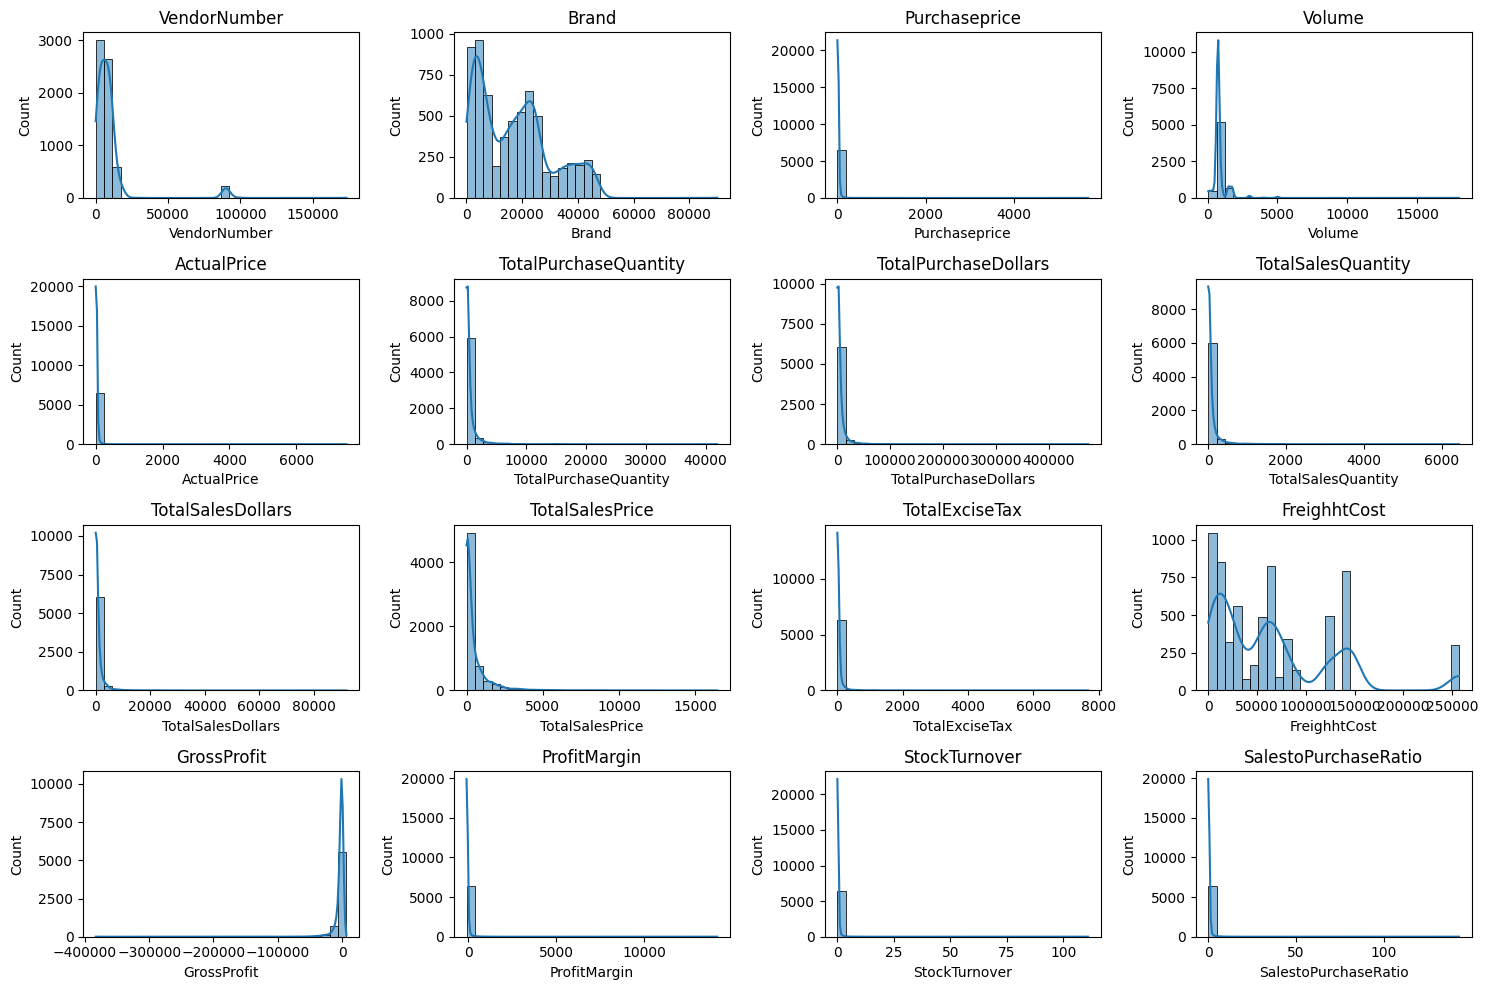

In [4]:
# Distribution Plots for Numerical Columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()

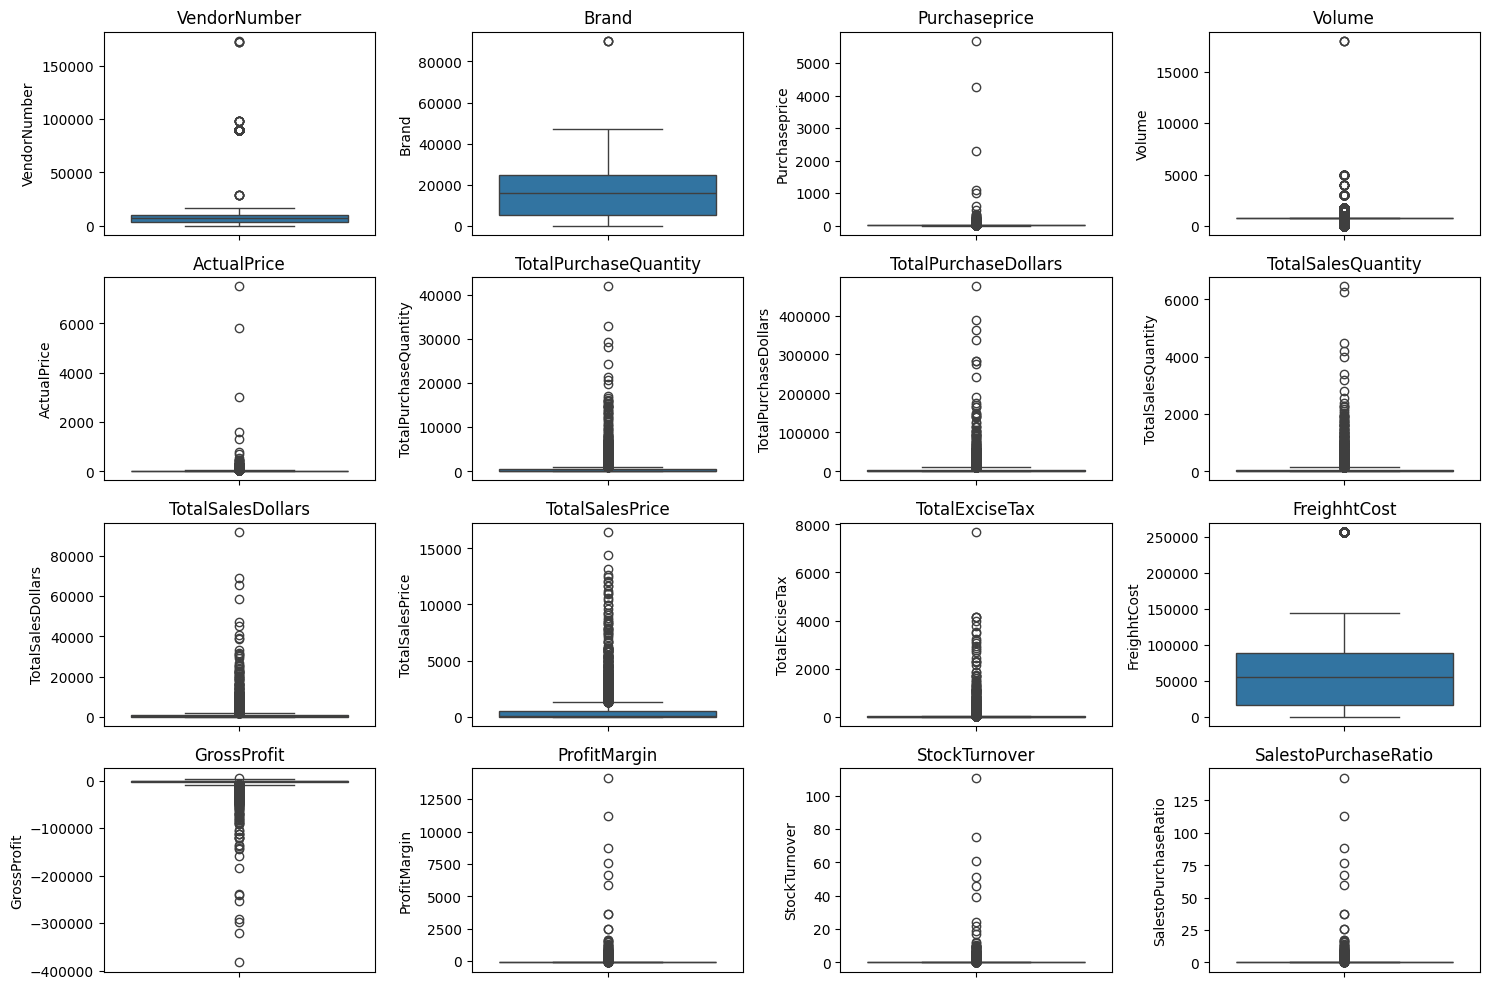

In [5]:
# Outliers Detection with boxplots
numerical_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y= df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

# Summary Statistics

**Negative & Zero Values**


*   Gross profit: Minimum value 382956.54 indicating losses. Some product or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
*   Profit Margin: Has a minimum of -100, which suggest cases where revenue is zero or even lower than costs.
*   Total Sales Quantity & Sales DOllars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolute stock

**Outliers indicated by High Standard Deviations:**


*   Purchase &  Actual Price : The maximum values are significantly higher than the mean, indicating potential premium products.
*   Frieght Cost: Huge variation, from 0.09 to 257,032.07, suggests logistic inefficiencies or bult shipments.
*  Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely, Values more than  indiactes that Sold quantity for that higher than purchased quantity due to either salees are being fullfilled from the older stock.












In [6]:
# filtering the data for removing inconsistencies

df = pd.read_sql_query("""SELECT * FROM vendor_sale_summary
WHERE GrossProfit >= 0
AND ProfitMargin >= 0
AND TotalSalesQuantity > 0""",conn)
df

,VendorNumber,VendorName,Brand,Purchaseprice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreighhtCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,4425,MARTIGNETTI COMPANIES,26383,7.89,750.0,15.99,640.0,5049.60,432.0,5179.68,1822.48,48.31,144929.24,130.08,2.576046,0.675000,1.025760
1,17035,PERNOD RICARD USA,3811,12.68,750.0,16.99,144.0,1825.92,118.0,2122.82,1133.37,92.99,123780.22,296.90,16.260296,0.819444,1.162603
2,3960,DIAGEO NORTH AMERICA INC,3987,8.65,750.0,12.99,188.0,1626.20,168.0,1846.32,967.12,132.34,257032.07,220.12,13.535850,0.893617,1.135359
3,3960,DIAGEO NORTH AMERICA INC,1001,4.28,50.0,5.99,373.0,1596.44,338.0,2024.62,449.25,17.55,257032.07,428.18,26.820927,0.906166,1.268209
4,9552,M S WALKER INC,23353,10.95,750.0,15.99,106.0,1160.70,111.0,1774.89,1071.33,12.32,55551.82,614.19,52.915482,1.047170,1.529155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1392,CONSTELLATION BRANDS INC,18000,2.75,1500.0,6.99,1.0,2.75,9.0,35.91,19.95,2.02,79528.99,33.16,1205.818182,9.000000,13.058182
324,9165,ULTRA BEVERAGE COMPANY LLP,9191,0.73,50.0,0.99,3.0,2.19,17.0,16.83,8.91,0.88,68054.70,14.64,668.493151,5.666667,7.684932
325,6213,MHW LTD,4703,0.77,50.0,0.99,2.0,1.54,222.0,219.78,97.02,11.45,9621.58,218.24,14171.428571,111.000000,142.714286
326,3960,DIAGEO NORTH AMERICA INC,8495,0.71,50.0,0.99,2.0,1.42,4.0,3.96,2.97,0.20,257032.07,2.54,178.873239,2.000000,2.788732


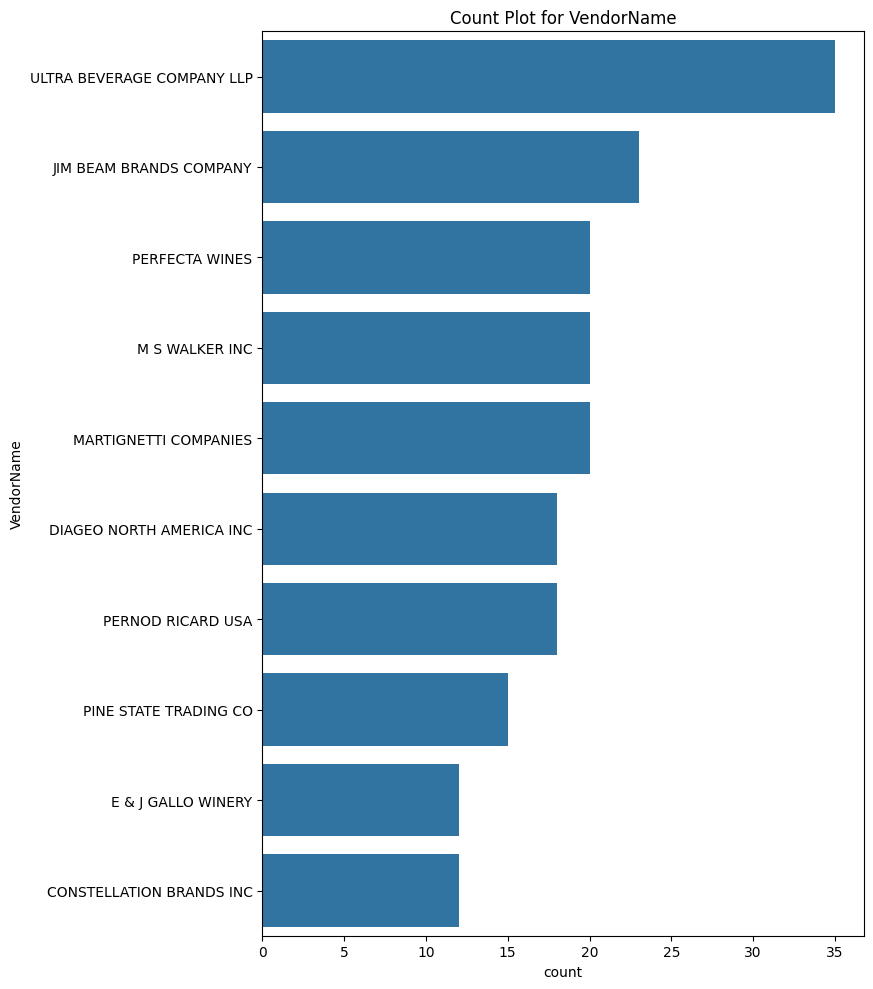

In [7]:
# count plot for categorical columns

categorical_cols = ['VendorName']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y =df[column], order = df[column].value_counts().index[:10])
    plt.title(f'Count Plot for {column}')

plt.tight_layout()
plt.show()

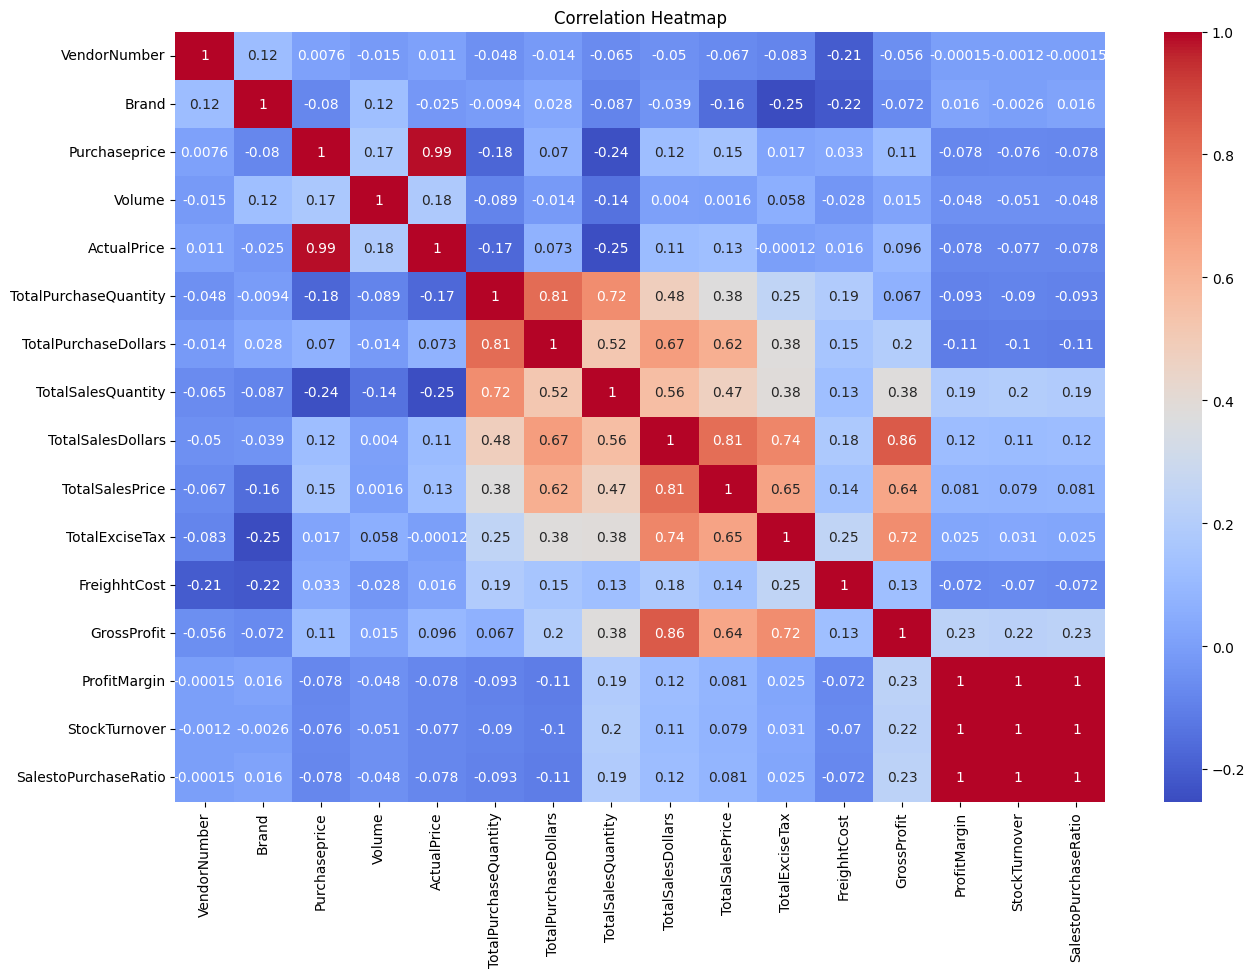

In [8]:
# correlation Heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Strongest positives**

* TotalSalesDollars, TotalSalesPrice, and TotalSalesQuantity form a tight block of high positive correlations, indicating these measures move together strongly in this dataset.

* GrossProfit correlates strongly with TotalSalesDollars/Price/Quantity, suggesting higher sales are closely tied to higher gross profit.

* TotalExciseTax tracks closely with TotalSales metrics, implying taxes scale with sales volume/value.

* Purchase vs sales links
TotalPurchaseQuantity and TotalPurchaseDollars show moderate-to-strong positive correlations with TotalSalesQuantity and TotalSalesDollars, consistent with inventory flowing through to sales.

* Purchaseprice has mild-to-moderate positive correlation with TotalSalesPrice/Dollars, suggesting some pass-through from procurement cost to selling price/revenue.

* Pricing/volume effects
ActualPrice shows a moderate positive relationship with TotalSalesPrice and TotalSalesDollars, but only weak ties to Quantity, hinting that revenue aligns more with price than with units sold in this sample.

* Volume has generally weak correlations across metrics, indicating volume units here are not a dominant driver of sales or margins compared to price and totals.

**Weak or negligible links**

* VendorNumber and Brand display near-zero correlations with most financial measures, implying vendor/brand identifiers alone don’t explain variation in sales or profit in this view.

* StockTurnover, ProfitMargin, and SalestoPurchaseRatio appear computed from sales and purchase metrics and therefore show near-perfect correlation among themselves but only modest additional insight beyond the core sales block

# DATA ANALYSIS

**Identify Brands that needs Promotional or pricing adjustments which exhibit lower sales performance but higher profit margins.**

In [9]:
brand_performance= df.groupby('Brand').agg(
    {"TotalSalesDollars":'sum',
     'ProfitMargin':'mean'}).reset_index()

In [10]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['TotalSalesDollars'].quantile(0.85)

In [11]:
low_sales_threshold

np.float64(47.543)

In [12]:
high_margin_threshold

np.float64(759.0355)

In [13]:
# filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low sales but high profit margins:")
print(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins:
     Brand  TotalSalesDollars  ProfitMargin
210  18000              35.91   1205.818182


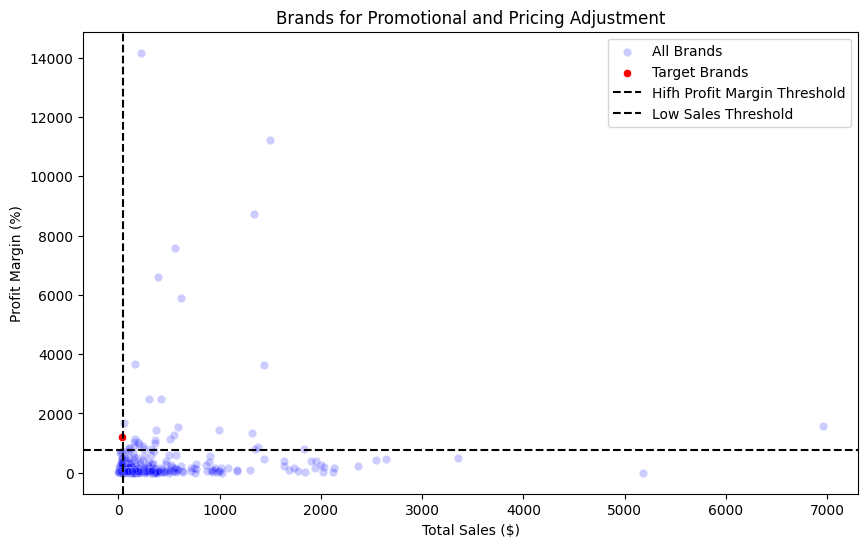

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data= brand_performance, x ='TotalSalesDollars', y ='ProfitMargin',color='blue',label='All Brands',alpha =0.2)
sns.scatterplot(data= target_brands, x ='TotalSalesDollars', y ='ProfitMargin',color='red',label='Target Brands')

plt.axhline(high_margin_threshold, linestyle ='--',color='black', label='Hifh Profit Margin Threshold')
plt.axvline(low_sales_threshold, linestyle ='--',color='black', label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional and Pricing Adjustment')
plt.legend()
plt.show()

**Which vendors & Brands demonstrate the highest sales performance**




In [15]:
def format_dollars(value):
  if value >= 1_000_000:
    return f"${value/1_000_000:.2f}M"
  elif value >= 1_000:
    return f"${value/1_000:.2f}K"
  else:
    return str(value)

In [16]:
# Top vendors & brands by sales performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Brand')['TotalSalesDollars'].sum().nlargest(10)
top_vendors

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,15107.79
MARTIGNETTI COMPANIES,14258.59
BROWN-FORMAN CORP,13505.62
ULTRA BEVERAGE COMPANY LLP,13036.28
M S WALKER INC,9988.96
PERNOD RICARD USA,8305.28
BACARDI USA INC,7550.62
PERFECTA WINES,6317.58
JIM BEAM BRANDS COMPANY,4531.63


In [17]:
top_brands

,TotalSalesDollars
Brand,
3761,6958.55
26383,5179.68
1060,3350.89
1064,2641.87
2131,2546.04
1781,2364.57
24936,2128.58
3811,2122.82
1244,2030.73


In [18]:
top_brands.apply(lambda x : format_dollars(x))

,TotalSalesDollars
Brand,
3761,$6.96K
26383,$5.18K
1060,$3.35K
1064,$2.64K
2131,$2.55K
1781,$2.36K
24936,$2.13K
3811,$2.12K
1244,$2.03K


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'DIAGEO NORTH AMERICA INC'),
  Text(1, 0, 'MARTIGNETTI COMPANIES'),
  Text(2, 0, 'BROWN-FORMAN CORP'),
  Text(3, 0, 'ULTRA BEVERAGE COMPANY LLP'),
  Text(4, 0, 'M S WALKER INC'),
  Text(5, 0, 'PERNOD RICARD USA'),
  Text(6, 0, 'BACARDI USA INC'),
  Text(7, 0, 'PERFECTA WINES'),
  Text(8, 0, 'JIM BEAM BRANDS COMPANY'),
  Text(9, 0, 'SOUTHERN WINE & SPIRITS NE')])

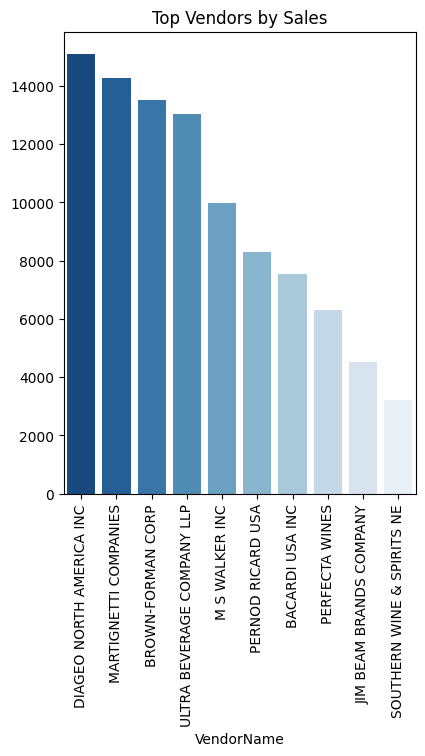

In [19]:
plt.figure(figsize=(10, 6))

# plot for top vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=top_vendors.index, y=top_vendors.values, palette='Blues_r')
plt.title('Top Vendors by Sales')
plt.xticks(rotation=90)

  # plot for top brands






([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '3761'),
  Text(1, 0, '26383'),
  Text(2, 0, '1060'),
  Text(3, 0, '1064'),
  Text(4, 0, '2131'),
  Text(5, 0, '1781'),
  Text(6, 0, '24936'),
  Text(7, 0, '3811'),
  Text(8, 0, '1244'),
  Text(9, 0, '1001')])

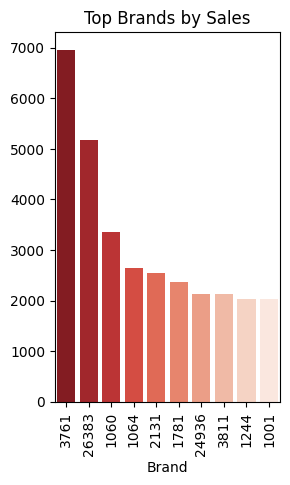

In [20]:
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=top_brands.index.astype(str), y=top_brands.values, palette='Reds_r')
plt.title('Top Brands by Sales')
plt.xticks(rotation=90)

**Which vendors contribute the most total purchase dollars?**

In [21]:
vendor_performance= df.groupby(['VendorName']).agg({
    'TotalPurchaseDollars' : 'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars' : 'sum'
}).sort_values('TotalPurchaseDollars',ascending=False).reset_index()

In [22]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()

In [23]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending= False),3).head(10)

In [24]:
top_vendors= vendor_performance.head(10)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(lambda x: format_dollars(x))
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(lambda x: format_dollars(x))
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(lambda x: format_dollars(x))
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,MARTIGNETTI COMPANIES,$8.88K,$5.38K,$14.26K,0.148
1,DIAGEO NORTH AMERICA INC,$5.51K,$9.59K,$15.11K,0.092
2,M S WALKER INC,$4.88K,$5.11K,$9.99K,0.082
3,PERNOD RICARD USA,$4.77K,$3.54K,$8.31K,0.080
4,ULTRA BEVERAGE COMPANY LLP,$4.24K,$8.80K,$13.04K,0.071
5,PERFECTA WINES,$3.61K,$2.70K,$6.32K,0.060
6,BROWN-FORMAN CORP,$2.90K,$10.60K,$13.51K,0.049
7,BACARDI USA INC,$2.86K,$4.69K,$7.55K,0.048
8,JIM BEAM BRANDS COMPANY,$2.35K,$2.18K,$4.53K,0.039
9,CONSTELLATION BRANDS INC,$1.53K,$1.34K,$2.87K,0.026


In [25]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
0,MARTIGNETTI COMPANIES,$8.88K,$5.38K,$14.26K,0.148,0.148
1,DIAGEO NORTH AMERICA INC,$5.51K,$9.59K,$15.11K,0.092,0.240
2,M S WALKER INC,$4.88K,$5.11K,$9.99K,0.082,0.322
3,PERNOD RICARD USA,$4.77K,$3.54K,$8.31K,0.080,0.402
4,ULTRA BEVERAGE COMPANY LLP,$4.24K,$8.80K,$13.04K,0.071,0.473
5,PERFECTA WINES,$3.61K,$2.70K,$6.32K,0.060,0.533
6,BROWN-FORMAN CORP,$2.90K,$10.60K,$13.51K,0.049,0.582
7,BACARDI USA INC,$2.86K,$4.69K,$7.55K,0.048,0.630
8,JIM BEAM BRANDS COMPANY,$2.35K,$2.18K,$4.53K,0.039,0.669
9,CONSTELLATION BRANDS INC,$1.53K,$1.34K,$2.87K,0.026,0.695


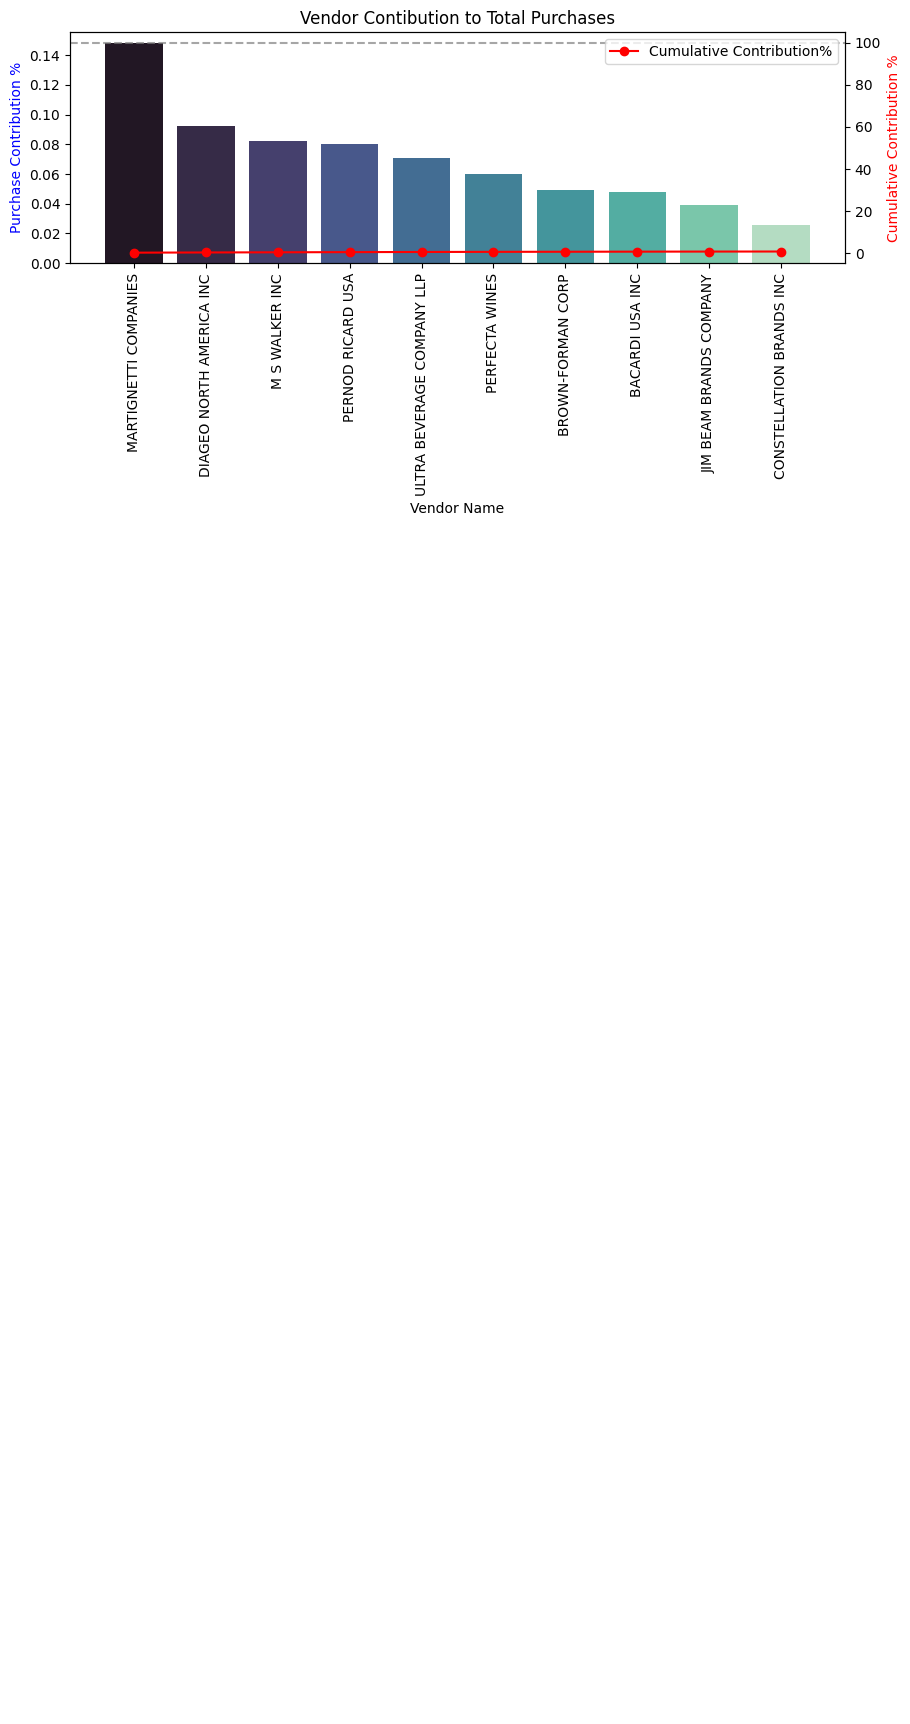

In [26]:
fig, ax1 = plt.subplots(figsize=(10,3))

#Barplot purchase contribution%

sns.barplot(data=top_vendors, x='VendorName', y='PurchaseContribution%', ax=ax1, palette='mako')

for i, value in enumerate(top_vendors['PurchaseContribution%']):
  ax1.text(i, value - 1, str(value) + '%', ha = 'center', fontsize=10, color='white')

# Line plot for cumulative Contribution%

ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='-', label='Cumulative Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_xlabel('Vendor Name')
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_title('Vendor Contibution to Total Purchases')

ax2.axhline(y =100, color= 'grey', linestyle='dashed', alpha=0.7)
ax2.legend(loc = 'upper right')

plt.show()

**How much of total procurement is dependent on the top vendors**

In [27]:
print(f" Total Purchase Comtribition of top 10 vendors is {round(vendor_performance['PurchaseContribution%'].sum()*100,2)}%")

 Total Purchase Comtribition of top 10 vendors is 69.5%


In [28]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

# Append "other vendors " category
vendors.append("Other Vendors")
purchase_contribution.append(remaining_contribution)

# Donut Chart
fig, ax1 = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax1.pie(purchase_contribution, labels=vendors, autopct='%1.1f%%', startangle=140,pctdistance=140, colors=plt.cm.Paired.colors)

#Draw a white circle in the center to create a 'DOnut" effect

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
# Add Total Contibution annotation in the center
plt.text(0,0 ,f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendors Purchase Contribution")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings**

In [29]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [30]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels= ['Small', "Medium", "Large"])


In [31]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

,UnitPurchasePrice
OrderSize,
Small,18.040714
Medium,14.993611
Large,9.022963


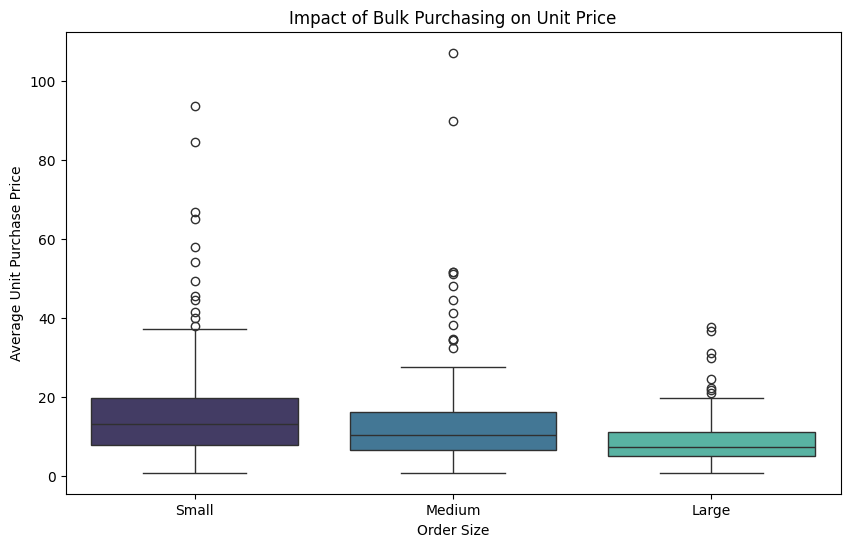

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x ='OrderSize', y ='UnitPurchasePrice', palette='mako')
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()



*   Vendors buying bulk get the lowest unit price , meaning higher margins if they can manage inventory efficiently.
*   The price differrence b/w Small and large orders is substantial
*   This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per unit revenue.







**Which vendors have low inventory turnover, indicating excess stock and sow-moving products?**

In [44]:
df[df['StockTurnover'] < 1].groupby('VendorName', as_index=False)['StockTurnover'].mean().sort_values(by='StockTurnover', ascending=True).head(10)

,VendorName,StockTurnover
2,CONSTELLATION BRANDS INC,0.573889
5,Dunn Wine Brokers,0.666667
7,HEAVEN HILL DISTILLERIES,0.666667
13,PALM BAY INTERNATIONAL INC,0.666667
21,WALPOLE MTN VIEW WINERY,0.692308
14,PERFECTA WINES,0.714215
12,OLE SMOKY DISTILLERY LLC,0.714286
10,M S WALKER INC,0.725774
15,PERNOD RICARD USA,0.743056
17,SAZERAC NORTH AMERICA INC.,0.750000


**how much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it.**

In [48]:
df["unsolvedInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["Purchaseprice"]
print('Total Unsold Capital:', format_dollars(df["unsolvedInventoryValue"].sum()))

Total Unsold Capital: -36915.78


In [49]:
#Aggregate capital locked per vendor
inventory_value_per_vector = df.groupby('VendorName')['unsolvedInventoryValue'].sum().reset_index()

#sort values with the highest locked capital
inventory_value_per_vector = inventory_value_per_vector.sort_values('unsolvedInventoryValue', ascending=False)
inventory_value_per_vector['UnsoldInventoryValue'] = inventory_value_per_vector['unsolvedInventoryValue'].apply(lambda x: format_dollars(x))
inventory_value_per_vector.head(10)

,VendorName,unsolvedInventoryValue,UnsoldInventoryValue
30,PALM BAY INTERNATIONAL INC,106.44,106.44000000000001
8,CRUSH WINES,103.19,103.19
45,Serralles Usa LLC,66.63,66.63
53,WALPOLE MTN VIEW WINERY,45.72,45.72
29,OLE SMOKY DISTILLERY LLC,27.12,27.12
47,TRINCHERO FAMILY ESTATES,16.10,16.1
13,Dunn Wine Brokers,12.98,12.98
16,FORTUNE WINE BROKERS LLC,0.00,0.0
6,CHARLES JACQUIN ET CIE INC,0.00,0.0
21,LAIRD & CO,0.00,0.0


# Confidence Interval & Hypothesis Testing

**What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors **

In [59]:
top_thresholds = df["TotalSalesDollars"].quantile(0.75)
low_thresholds = df["TotalSalesDollars"].quantile(0.25)

In [60]:
top_vendors = df[df["TotalSalesDollars"] >= top_thresholds]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_thresholds]["ProfitMargin"].dropna()

In [68]:
def confidence_intervals(data, confidence = 0.95):
  mean_val = np.mean(data)
  std_err = np.std(data, ddof=1)/ np.sqrt(len(data))
  t_critical = stats.t.ppf((1+confidence)/2, df=len(data)-1)
  margin_of_error = t_critical * std_err
  return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% Confidence Intervals: Mean: 723.82, Lower: 313.51, Upper: 1134.13
Low Vendors 95% Confidence Intervals: Mean: 193.60, Lower: 134.28, Upper: 252.92


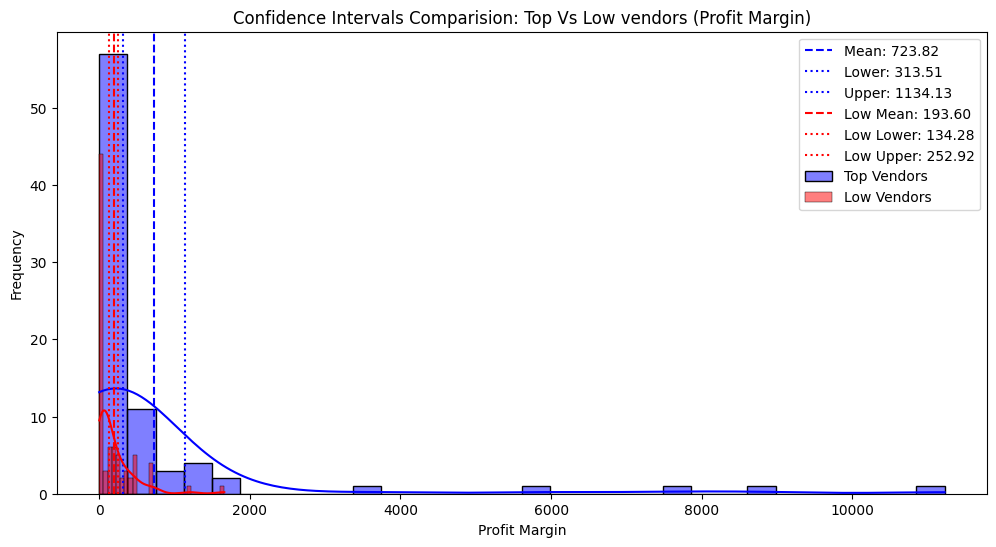

In [69]:
top_mean, top_lower, top_upper = confidence_intervals(top_vendors)
low_mean, low_lower, low_upper = confidence_intervals(low_vendors)

print(f"Top Vendors 95% Confidence Intervals: Mean: {top_mean:.2f}, Lower: {top_lower:.2f}, Upper: {top_upper:.2f}")
print(f"Low Vendors 95% Confidence Intervals: Mean: {low_mean:.2f}, Lower: {low_lower:.2f}, Upper: {low_upper:.2f}")

plt.figure(figsize=(12,6))

#Top Vendors Plot
sns.histplot(top_vendors, kde=True, bins=30, color='blue', label='Top Vendors', alpha=0.5)
plt.axvline(top_mean, color='blue', linestyle='--', label=f'Mean: {top_mean:.2f}')
plt.axvline(top_lower, color='blue', linestyle=':', label=f'Lower: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle=':', label=f'Upper: {top_upper:.2f}')

#Low Vendors Plot
sns.histplot(low_vendors, kde=True, bins=30, color='red', label='Low Vendors', alpha=0.5)
plt.axvline(low_mean, color='red', linestyle='--', label=f'Low Mean: {low_mean:.2f}')
plt.axvline(low_lower, color='red', linestyle=':', label=f'Low Lower: {low_lower:.2f}')
plt.axvline(low_upper, color='red', linestyle=':', label=f'Low Upper: {low_upper:.2f}')


plt.title("Confidence Intervals Comparision: Top Vs Low vendors (Profit Margin)")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.legend()
plt.show()


* Top-performing vendors have a much higher average profit margin than low-performing vendors.

* Their profit margins are also more variable, as indicated by the wider confidence interval.

* Low-performing vendors have lower and more consistent profit margins, as shown by the tighter confidence interval.



**Top vendors:**

* Learn from the best to help others.

* Support them to keep profits steady.

* Reward and guide them for more growth.

**Low vendors:**

* Help them improve with training and advice.

* Show them how top vendors succeed.

* Set small, realistic goals to grow.

Is there a significant difference in profit margins B/w top performing and low performing vendors ?

Hypothesis:

H0: There is no significant diff. in the mean profit margins and top-performing and low performing vendors

H1: The mean profit margins of top - performing and low-performing vendors are significantly different

In [70]:
top_thresholds = df["TotalSalesDollars"].quantile(0.75)
low_thresholds = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_thresholds]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_thresholds]["ProfitMargin"].dropna()

# perform two- sample t-test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var= False)

#prnt results
print(f"T - statistic: {t_stat:.4f}, {p_value:.4f}")

if p_value < 0.05:
  print("Reject the null hypothesis:  There is a significant diff. in the mean profit margins and top-performing and low performing vendors")
else:
  print("Fail to reject the null hypothesis: No significant diff. in profit margin")

T - statistic: 2.5447, 0.0128
Reject the null hypothesis:  There is a significant diff. in the mean profit margins and top-performing and low performing vendors
